<a href="https://colab.research.google.com/github/karthikmandelli/frugal-labs-/blob/main/RANDOM_FORESTand_svr_and_gb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##randomforest
##gradient boosting
##svr



In [ ]:
import pandas as pd
df = pd.read_excel("/content/last excel temperature yyy-mm-dd.xlsx")

In [ ]:
data.head()

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [ ]:
cutoff_date = pd.to_datetime('2023-05-01')
train_df = df[df.index <= cutoff_date]
test_df = df[df.index > cutoff_date]


In [ ]:
df.fillna(method="ffill",inplace=True)

In [ ]:
df.isnull().sum()

Maxtemperature    0
MinTemperature    0
Maxhumidity       0
Minhumidity       0
rainfall          0
dtype: int64

In [ ]:
X_train = train_df[[ 'MinTemperature', 'Maxhumidity', 'rainfall']]
y_train = train_df['Maxtemperature']

X_test = test_df[[ 'MinTemperature', 'Maxhumidity', 'rainfall']]
y_test = test_df['Maxtemperature']


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)


In [ ]:
mse

3.2719565254610083

In [ ]:
predictions = pd.DataFrame({'Date': test_df.index, 'Predicted_Maxtemperature': y_pred})
print(predictions)


         Date  Predicted_Maxtemperature
0  2023-05-02                 29.689167
1  2023-05-03                 29.757500
2  2023-05-04                 32.712892
3  2023-05-05                 30.031214
4  2023-05-06                 28.977738
5  2023-05-07                 29.810512
6  2023-05-08                 32.535894
7  2023-05-09                 30.434476
8  2023-05-10                 32.067619
9  2023-05-11                 32.231583
10 2023-05-12                 32.986500
11 2023-05-13                 30.650143
12 2023-05-14                 30.809476
13 2023-05-15                 29.757500
14 2023-05-16                 32.712892
15 2023-05-17                 30.031214
16 2023-05-18                 30.031214
17 2023-05-19                 31.802667
18 2023-05-20                 30.650143
19 2023-05-21                 29.972500
20 2023-05-22                 33.320111
21 2023-05-23                 32.471940
22 2023-05-24                 31.705000
23 2023-05-25                 32.471940


In [ ]:
y_test

DATE
2023-05-02    31.0
2023-05-03    33.0
2023-05-04    31.0
2023-05-05    32.0
2023-05-06    30.0
2023-05-07    32.0
2023-05-08    30.0
2023-05-09    32.0
2023-05-10    33.0
2023-05-11    31.0
2023-05-12    30.0
2023-05-13    29.0
2023-05-14    30.0
2023-05-15    30.0
2023-05-16    29.0
2023-05-17    30.0
2023-05-18    30.0
2023-05-19    31.0
2023-05-20    32.0
2023-05-21    33.0
2023-05-22    32.0
2023-05-23    32.0
2023-05-24    30.0
2023-05-25    31.0
2023-05-26    30.0
2023-05-27    31.0
2023-05-28    30.0
2023-05-29    29.0
2023-05-30    30.0
2023-05-31    29.0
Name: Maxtemperature, dtype: float64

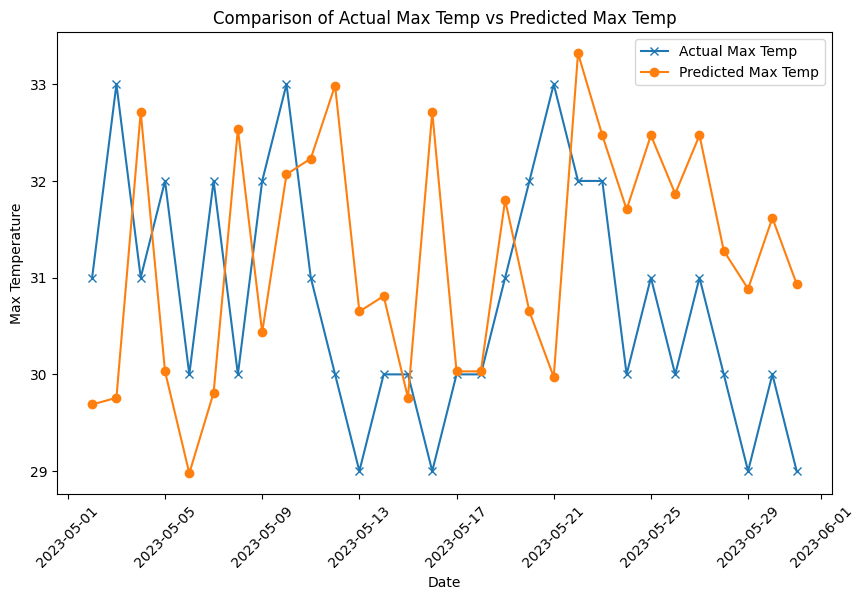

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Date': test_df.index, 'Actual_Maxtemperature': y_test, 'Predicted_Maxtemperature': y_pred})

# Plot the maximum temperature values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Date'], comparison_df['Actual_Maxtemperature'], label='Actual Max Temp', marker='x')
plt.plot(comparison_df['Date'], comparison_df['Predicted_Maxtemperature'], label='Predicted Max Temp', marker='o')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Comparison of Actual Max Temp vs Predicted Max Temp')
plt.legend()
plt.xticks(rotation=45)
plt.show()



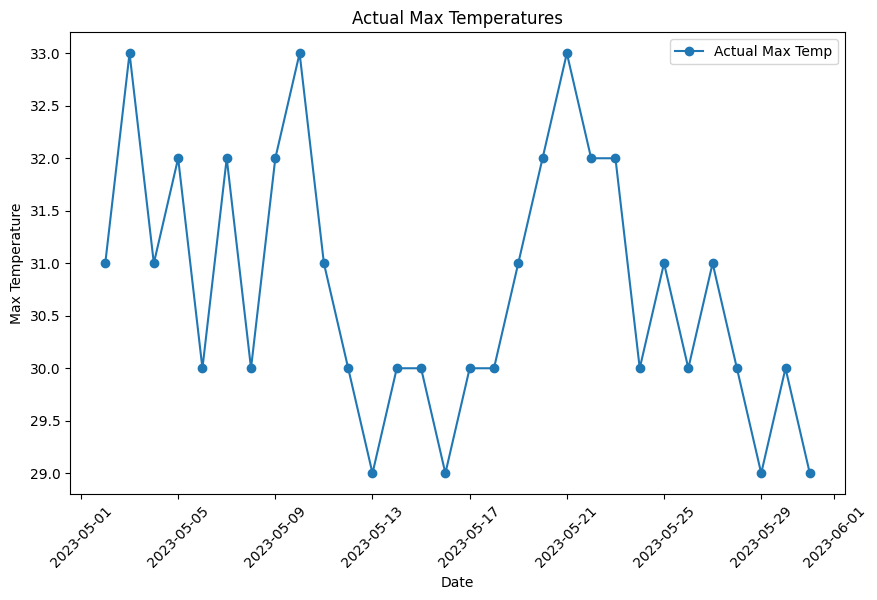

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual maximum temperatures
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, y_test, label='Actual Max Temp', marker='o')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Actual Max Temperatures')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
concat_df = pd.concat([train_df, test_df])


In [ ]:
X_train_concat = concat_df[['MinTemperature', 'Maxhumidity', 'rainfall']]
y_train_concat = concat_df['Maxtemperature']


In [ ]:
model = RandomForestRegressor()
model.fit(X_train_concat, y_train_concat)


RandomForestRegressor()

In [ ]:

# Generate the forecast dates
forecast_start_date = pd.to_datetime('2023-06-01')
forecast_dates = pd.date_range(start=forecast_start_date, periods=30, freq='D')

# Perform the forecast
X_forecast = test_df[[ 'MinTemperature', 'Maxhumidity', 'rainfall']]
y_forecast = model.predict(X_forecast)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Maxtemperature': y_forecast})

# Print the forecasted maximum temperatures with their corresponding dates
print(forecast_df)


         Date  Forecasted_Maxtemperature
0  2023-06-01                  30.660000
1  2023-06-02                  30.224333
2  2023-06-03                  32.019807
3  2023-06-04                  30.545654
4  2023-06-05                  29.272008
5  2023-06-06                  31.354167
6  2023-06-07                  32.086937
7  2023-06-08                  31.190000
8  2023-06-09                  32.220143
9  2023-06-10                  31.133024
10 2023-06-11                  31.129000
11 2023-06-12                  30.536111
12 2023-06-13                  30.433333
13 2023-06-14                  30.224333
14 2023-06-15                  32.019807
15 2023-06-16                  30.545654
16 2023-06-17                  30.545654
17 2023-06-18                  31.121000
18 2023-06-19                  30.536111
19 2023-06-20                  32.124167
20 2023-06-21                  32.501762
21 2023-06-22                  31.322845
22 2023-06-23                  31.057500
23 2023-06-24   

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the R-squared
print("R-squared:", r2)


R-squared: -1.2634595487432043


In [ ]:
X = df[['Maxtemperature', 'MinTemperature', 'Maxhumidity', 'rainfall']]
y = df['Maxtemperature']

model.fit(X, y)


RandomForestRegressor()

##FEATUTRE SELECTION


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation coefficients with the target variable (Maxtemperature)
correlation_with_target = correlation_matrix['Maxtemperature'].abs().sort_values(ascending=False)

# Print the correlation coefficients
print(correlation_with_target)


Maxtemperature    1.000000
rainfall          0.383647
Minhumidity       0.275804
MinTemperature    0.117421
Maxhumidity       0.000304
Name: Maxtemperature, dtype: float64


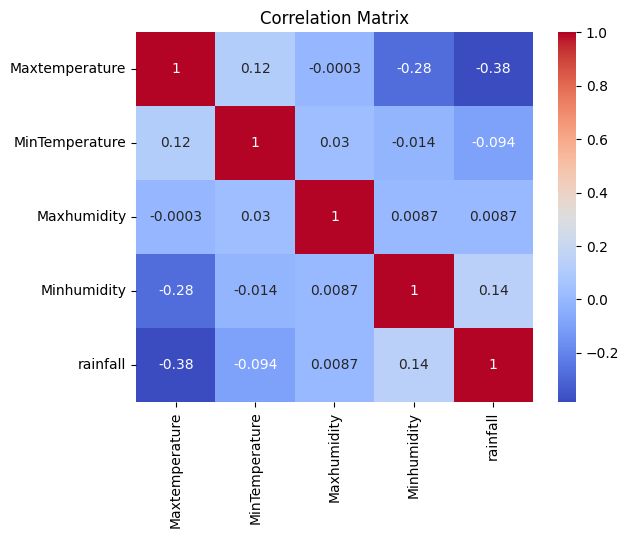

In [ ]:
import seaborn as sns

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X_train = train_df[[ 'MinTemperature', 'Maxhumidity', 'rainfall']]
y_train = train_df['Maxtemperature']

X_test = test_df[[ 'MinTemperature', 'Maxhumidity', 'rainfall']]
y_test = test_df['Maxtemperature']


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

3.306310641674812

In [ ]:
y_pred

array([30.03333333, 29.58833333, 32.82972222, 30.41219841, 29.04184524,
       30.1805    , 32.48531654, 31.0892381 , 31.99824603, 32.35625397,
       33.15228571, 30.90671429, 31.5952381 , 29.58833333, 32.82972222,
       30.41219841, 30.41219841, 31.69333333, 30.90671429, 29.82333333,
       33.2975    , 32.6210873 , 31.29333333, 32.6210873 , 31.90833333,
       32.6210873 , 31.21583333, 30.88130952, 31.66833333, 30.77976984])

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the R-squared
print("R-squared:", r2)


R-squared: -1.287224886631308


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,400],  # Number of trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
predictions = pd.DataFrame({'Date': test_df.index, 'Predicted_Maxtemperature': y_pred})
print(predictions)

# Calculate the RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the random forest
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Minimum number of samples required at each leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
predictions = pd.DataFrame({'Date': test_df.index, 'Predicted_Maxtemperature': y_pred})
print(predictions)

# Calculate the RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
predictions = pd.DataFrame({'Date': test_df.index, 'Predicted_Maxtemperature': y_pred})
print(predictions)

# Calculate the RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: -0.15001578787894077
         Date  Predicted_Maxtemperature
0  2023-05-02                 29.332794
1  2023-05-03                 30.862050
2  2023-05-04                 30.771961
3  2023-05-05                 30.682250
4  2023-05-06                 30.682290
5  2023-05-07                 30.603590
6  2023-05-08                 30.681912
7  2023-05-09                 29.669700
8  2023-05-10                 30.771981
9  2023-05-11                 30.727044
10 2023-05-12                 29.186242
11 2023-05-13                 30.772001
12 2023-05-14                 30.681952
13 2023-05-15                 30.862050
14 2023-05-16                 30.771961
15 2023-05-17                 30.682250
16 2023-05-18                 30.682250
17 2023-05-19                 29.253481
18 2023-05-20                 30.772001
19 2023-05-21                 30.524633
20 2023-05-22                 30.952109
21 2023-05-23                 30.862010
22 2023-05-24                 30.580879
23 2023-

R-squared: -0.721808467193777
Root Mean Squared Error (RMSE): 1.5776469172012344


Text(0.5, 0, 'Date')

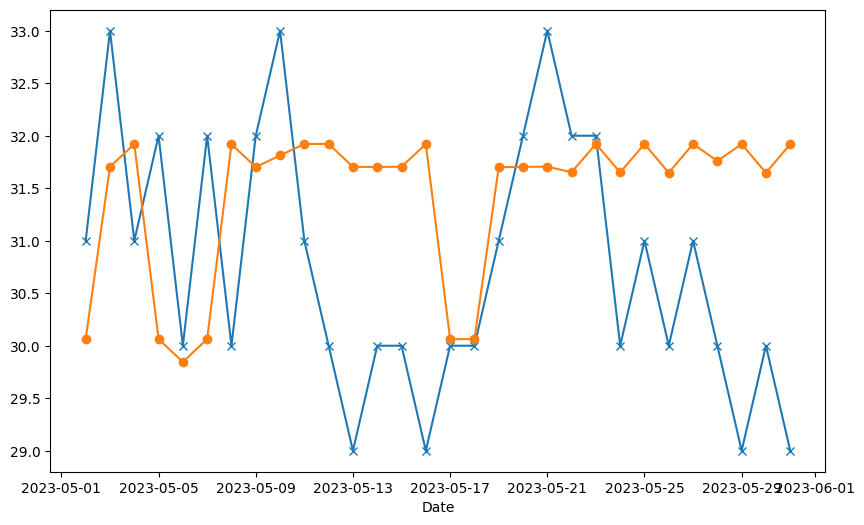

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("/content/last excel temperature yyy-mm-dd.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.fillna(method="ffill",inplace=True)
# Split the data into train and test sets
cutoff_date = pd.to_datetime('2023-05-01')
train_df = df[df.index <= cutoff_date]
test_df = df[df.index > cutoff_date]

# Prepare the training and test data
X_train = train_df[['MinTemperature', 'Maxhumidity', 'rainfall']]
y_train = train_df['Maxtemperature']
X_test = test_df[['MinTemperature', 'Maxhumidity', 'rainfall']]
y_test = test_df['Maxtemperature']

# Create and train the SVR model
model = SVR()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Date': test_df.index, 'Actual_Maxtemperature': y_test, 'Predicted_Maxtemperature': y_pred})

# Plot the maximum temperature values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Date'], comparison_df['Actual_Maxtemperature'], label='Actual Max Temp', marker='x')
plt.plot(comparison_df['Date'], comparison_df['Predicted_Maxtemperature'], label='Predicted Max Temp', marker='o')
plt.xlabel('Date')


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [ ]:
# Create a copy of the original data
preprocessed_df = df.copy()

# Drop any rows with missing values
preprocessed_df.dropna(inplace=True)

# Split the data into features and target
X = preprocessed_df[['MinTemperature', 'Maxhumidity', 'rainfall']]
y = preprocessed_df['Maxtemperature']

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [ ]:
model = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}


In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
best_model = SVR(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Best Hyperparameters:", best_params)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


Best Hyperparameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
R-squared: -0.6171123472296383
Root Mean Squared Error (RMSE): 2.5764238720596793


In [ ]:
import pandas as pd
import numpy as np

# Load your original dataset
df = pd.read_excel("/content/last excel temperature yyy-mm-dd.xlsx")

# Create a function to generate synthetic data
def augment_data(data):
    # Define augmentation parameters
    # You can modify these parameters based on your requirements
    num_samples = 1000  # Number of synthetic samples to generate
    noise_std = 0.1  # Standard deviation of the noise to add

    augmented_data = []

    # Iterate over each sample in the original data
    for sample in data:
        # Generate synthetic samples by adding random noise
        for _ in range(num_samples):
            augmented_sample = sample + np.random.normal(0, noise_std)
            augmented_data.append(augmented_sample)

    return augmented_data

# Extract the rainfall column from your dataset
rainfall_data = df['rainfall'].values

# Augment the rainfall data
augmented_rainfall_data = augment_data(rainfall_data)

# Concatenate the original and augmented data
augmented_df = pd.DataFrame({'rainfall': np.concatenate((rainfall_data, augmented_rainfall_data))})

# Save the augmented data to a new file
augmented_df.to_excel("/content/augmented_rainfall_data.xlsx", index=False)


In [ ]:
import pandas as pd
import numpy as np

# Load your original dataset
df = pd.read_excel("/content/last excel temperature yyy-mm-dd.xlsx")

# Create a function to generate synthetic data
def augment_data(data):
    # Define augmentation parameters
    # You can modify these parameters based on your requirements
    num_samples = 1000  # Number of synthetic samples to generate
    noise_std = 0.1  # Standard deviation of the noise to add

    augmented_data = []

    # Iterate over each sample in the original data
    for sample in data:
        # Generate synthetic samples by adding random noise
        for _ in range(num_samples):
            augmented_sample = sample + np.random.normal(0, noise_std)
            augmented_data.append(augmented_sample)

    return augmented_data

# Extract the relevant columns from your dataset
columns_to_augment = ['Maxtemperature', 'MinTemperature', 'rainfall',"Maxhumidity"]
augmented_data = {}

# Augment each column separately
for column in columns_to_augment:
    data = df[column].values
    augmented_data[column] = augment_data(data)

# Concatenate the original and augmented data
augmented_df = pd.DataFrame(augmented_data)

# Save the augmented data to a new file
augmented_df.to_excel("/content/augmented_data.xlsx", index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Load the augmented dataset
df = pd.read_excel("/content/augmented_data.xlsx")
df.fillna(method="ffill",inplace=True)
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['MinTemperature', 'Maxhumidity']],
                                                    df['Maxtemperature'],
                                                    test_size=0.2,
                                                    shuffle=False)
#df.fillna(method="ffill",inplace=True)
# Create the SVR model
model = SVR(kernel='rbf', C=10, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


FileNotFoundError: ignored

In [ ]:
from scipy import stats

# Calculate the z-scores for each numerical variable
z_scores = np.abs(stats.zscore(df[['MinTemperature', 'Maxhumidity', 'rainfall']]))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Identify the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
cleaned_df = df.drop(outlier_indices[0])
cleaned_df.fillna(method="ffill",inplace=True)
# Apply transformations if desired
# cleaned_df['MinTemperature'] = np.log(cleaned_df['MinTemperature'])
# cleaned_df['Maxhumidity'] = np.sqrt(cleaned_df['Maxhumidity'])

# Update the X_train and y_train variables with the cleaned dataset
X_train = cleaned_df[['MinTemperature', 'Maxhumidity', 'rainfall']]
y_train = cleaned_df['Maxtemperature']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


R-squared: -3.134281078538101
Mean Squared Error: 16.97049209039547


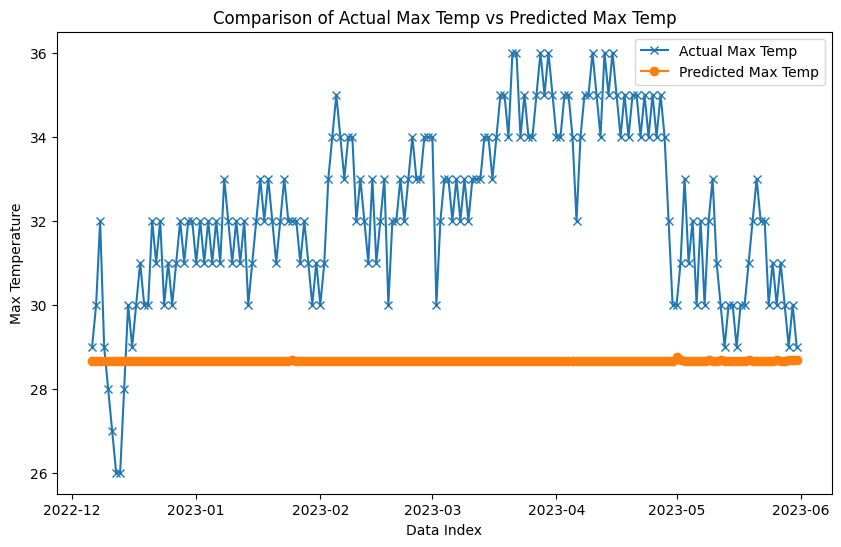

In [ ]:
# Create and fit your model using the cleaned dataset
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics such as R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared:", r2)
print("Mean Squared Error:", mse)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual_Maxtemperature': y_test, 'Predicted_Maxtemperature': y_pred})

# Visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual_Maxtemperature'], label='Actual Max Temp', marker='x')
plt.plot(comparison_df.index, comparison_df['Predicted_Maxtemperature'], label='Predicted Max Temp', marker='o')
plt.xlabel('Data Index')
plt.ylabel('Max Temperature')
plt.title('Comparison of Actual Max Temp vs Predicted Max Temp')
plt.legend()
plt.show()
